# During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA
# E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

In this tutorial I will demonstrate the basics of tensor flow and how to make a Artifical Neural network.The data set consists of data of customers of a bank.By using ANN Algorithm we will try to predict which customer will stay or exit the bank.This prediction will be useful for the Bank to make strategy to retain customers.This is a Kernel in process and I will be updating the Kernel in the coming days.If you Like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Churn_Modelling.csv']


**Building a computational graph**

In [2]:
import tensorflow as tf
node1=tf.constant(3.0,tf.float32)
node2=tf.constant(4.0)
print(node1,node2)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


Here we have to abstract tensor no operation is performed on the tensor 

**Running a computational graph**

In [3]:
sess=tf.Session()
print(sess.run([node1,node2]))
sess.close()

[3.0, 4.0]


**Another way of Running a computational graph**

In [4]:
with tf.Session() as sess:
    output=sess.run([node1,node2])
    print(output)

[3.0, 4.0]


So we have successfully run the session.3 and 4 are the values stored in the node 

**Multiplying two numbers **

In [5]:

#Build a graph
a=tf.constant(5.0)
b=tf.constant(6.0)

c=a*b

#Launch the graph in a session 
sess=tf.Session()

#Evaluate the tensor 'c'
print(sess.run(c))

sess.close()


30.0


**Defining place holder**

In [6]:

a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)

adder_node=a + b
sess=tf.Session()

print(sess.run(adder_node,{a:[1,3],b:[2,4]}))

[3. 7.]


**Defining a variable** 

In [7]:
import tensorflow as tf 

# Model Parameters 
W=tf.Variable([.3],tf.float32)   # Variable with initial value 0.3
b=tf.Variable([-.3],tf.float32)   # Variable with initial value -0.3

# Inputs and Outputs 
x=tf.placeholder(tf.float32)

linear_model= W*x + b

y=tf.placeholder(tf.float32)

# Loss Function 

squared_delta=tf.square(linear_model-y)
loss=tf.reduce_sum(squared_delta)

init=tf.global_variables_initializer() #to initalize all the variables in a tensor flow program

sess=tf.Session()
sess.run(init)
print(sess.run(linear_model,{x:[1,2,3,4],y:[0,-1,-2,-3]}))

[0.         0.3        0.6        0.90000004]


So if we were to change the value of W and b to -1 and 1 respectively the loss will be zero 

**Making use gradient descent optimizer **

In [8]:
# Model Parameters 
W=tf.Variable([.3],tf.float32)   # Variable with initial value 0.3
b=tf.Variable([-.3],tf.float32)   # Variable with initial value -0.3

# Inputs and Outputs 
x=tf.placeholder(tf.float32)

linear_model= W*x + b

y=tf.placeholder(tf.float32)

# Loss Function 

squared_delta=tf.square(linear_model-y)
loss=tf.reduce_sum(squared_delta)

# Optimize
optimizer=tf.train.GradientDescentOptimizer(0.01)
train=optimizer.minimize(loss)

init=tf.global_variables_initializer()  #to initalize all the variables in a tensor flow program

sess=tf.Session()
sess.run(init)

for i in range (500):
    sess.run(train,{x:[1,2,3,4],y:[0,-1,-2,-3]})
#print(sess.run(linear_model,{x:[1,2,3,4],y:[0,-1,-2,-3]}))

print(sess.run([W,b]))


[array([-0.9987147], dtype=float32), array([0.99622095], dtype=float32)]


### PART A: Preprocessing the input data

**1.Importing the Python Modules**

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore') 

In [10]:
dataset=pd.read_csv('../input/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634601,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


So we can see that the Data has the details of the customer's like Customer ID,Name,Credit Score,Country,Age,Sex and the dealings of a customer with the bank. 

**3.Generating Array of Features and Target Values**

In [11]:
X=dataset.iloc[:,3:13].values
#X
y=dataset.iloc[:,13].values

**4.Encoding the Catogerical Data **

In [12]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X_1=LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1]) #Encoding the values of column Country
labelencoder_X_2=LabelEncoder()
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])
onehotencoder=OneHotEncoder(categorical_features=[1])
X=onehotencoder.fit_transform(X).toarray()
X=X[:,1:]
#X

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


**5.Splitting the dataset to Train and Test Set**

In [13]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
#X_train

**6.Feature Scaling**

In [14]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#X_train

### PART B: Building the ANN

**7.Importing the Keras Library **

In [15]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense 

Using TensorFlow backend.


**8.Initialising the ANN **

In [16]:
classifier=Sequential()

### PART C: Making prediction and evaluating the model

**9.Adding the input layer and the first hidden layer **

In [17]:
classifier.add(Dense(output_dim=6,init='uniform',activation='relu',input_dim=11))

**10.Adding the second hidden Layer **

In [18]:
classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))

**11.Adding the output  layer **

In [19]:
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

**12.Compliling the ANN**

In [20]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**13.Fitting the ANN to training set **

In [21]:
#classifier.fit(X_train,y_train, batch_size=10, nb_epoch=100)
classifier.fit(X_train, y_train,batch_size=10,nb_epoch=100)

Epoch 1/100
8000/8000 [==============================] - 1s 176us/step - loss: 0.4816 - acc: 0.7955
Epoch 2/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.4290 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.4235 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4194 - acc: 0.8184
Epoch 5/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4168 - acc: 0.8271
Epoch 6/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4144 - acc: 0.8296
Epoch 7/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4136 - acc: 0.8299
Epoch 8/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.4119 - acc: 0.8319
Epoch 9/100
8000/8000 [==============================] - 1s 133us/step - loss: 0.4112 - acc: 0.8337
Epoch 10/100
8000/8000 [==============================] - 1s 155us/step - loss: 0.4101 - acc: 0.8345

**14.Predicting the test set results **

In [22]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)
#y_pred

**15.Making the confusion matrix**

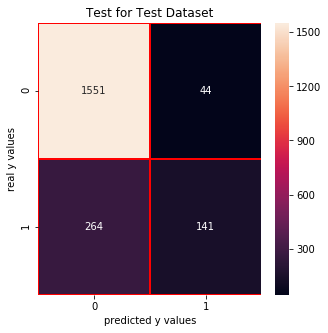

In [23]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

Correct prediction=1539+149=1688

Wrong predictions =256+56=312

Accuracy of Prediction =(1688/2000)*100 =84.4 %